## Artificial Neural Network (ANN)

**Why ANN is Used:**

Cricket data has complex, non-linear correlations that can be captured and modeled using Artificial Neural Networks (ANNs). Many interacting variables, including player performance, match conditions, and game state, are involved in wicket prediction and are difficult for linear models to adequately represent. ANNs are highly suited for such jobs because of their layered architecture, which allows them to automatically learn significant features and interactions from the data.

When processing high-dimensional data and a huge number of characteristics, ANNs provide a great deal of flexibility and adaptability. For your task, which uses features like cumulative score and runs in the last five overs, this capacity is essential. Furthermore, by continuously improving the accuracy of the model through backpropagation, the iterative learning process of artificial neural networks (ANNs) improves the model's capacity to generalize well to new data.

Artificial neural networks (ANNs) are a favored option for intricate predictions because to their ability to execute both regression and classification tasks with ease and their large dataset performance. For tasks like cricket wicket prediction, the use of sophisticated frameworks such as TensorFlow and Keras makes it simple to experiment and build various model architectures, which improves prediction accuracy and performance metrics.

### Preliminary Analysis for ANN Module

#### 1. Data Cleansing

For the ANN module, we performed data cleansing to ensure data quality. This involved handling missing values by converting `player_dismissed` to a binary `wicket` feature, correcting data types by manually encoding team names into numerical values, and removing duplicate entries to prevent skewing the model's learning process.

#### 2. Feature Engineering

Feature engineering was crucial to enhance the model's predictive power. We created new features like `cumulative score` and `runs_last_5` to capture recent performance trends. We encoded categorical variables (team names) into numerical values, addressed class imbalance by upsampling the minority class (wickets), and selected relevant features such as `inning`, `over`, `ball`, `score`, and `runs_last_5` to train the ANN model effectively.


### Methods

1. **Model Architecture**:
    - The model is a Sequential ANN with three hidden layers:
        - 64 neurons in the first layer with ReLU activation.
        - 32 neurons in the second layer with ReLU activation.
        - 16 neurons in the third layer with ReLU activation.
        - A single output neuron with sigmoid activation for binary classification.
    - Accuracy was used as the evaluation metric when compiling the model using the Adam optimizer and binary crossentropy loss.

2. **Training Performance**:
    - The model was trained for 50 epochs with a batch size of 64.
    - Training and validation loss both decreased over the epochs, indicating that the model was learning effectively.
    - Training and validation accuracy both increased, suggesting that the model was improving its ability to correctly classify wickets as training progressed.

3. **Evaluation Metrics**:
    - The final accuracy on the test set is approximately 63.4%.
    - The classification report provides further insight into the model's performance:
        - Precision for class 0 (no wicket) is 0.63.
        - Recall for class 0 (no wicket) is 0.63.
        - F1-score for class 0 (no wicket) is 0.63.
        - Precision for class 1 (wicket) is 0.63.
        - Recall for class 1 (wicket) is 0.64.
        - F1-score for class 1 (wicket) is 0.64.

4. **Confusion Matrix**:
    - The confusion matrix shows a fairly balanced distribution of true positives, true negatives, false positives, and false negatives.
    - This balance indicates that the model does not heavily favor one class over the other.

5. **Plots**:
    - The loss plot shows that both training and validation loss decrease steadily, with occasional fluctuations. This suggests the model is not overfitting.
    - The accuracy plot shows both training and validation accuracy improving over time, with the validation accuracy sometimes matching or exceeding the training accuracy. This indicates the model generalizes well to unseen data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

# Load the datasets
deliveries_df = pd.read_csv('deliveries.csv')
matches_df = pd.read_csv('matches.csv')

# Merging deliveries and matches data on match_id
merged_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')

# Creating new features
merged_df['wicket'] = merged_df['player_dismissed'].notnull().astype(int)
merged_df['score'] = merged_df.groupby('match_id')['total_runs'].cumsum()
merged_df['runs_last_5'] = merged_df.groupby('match_id')['total_runs'].rolling(window=5, min_periods=1).sum().reset_index(0, drop=True)

# Selecting relevant features
columns_to_keep = ['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'score', 'runs_last_5', 'wicket']
data = merged_df[columns_to_keep].copy()

# Manually encoding categorical variables
teams = data['batting_team'].unique().tolist()
team_mapping = {team: idx for idx, team in enumerate(teams)}
data['batting_team'] = data['batting_team'].map(team_mapping)
data['bowling_team'] = data['bowling_team'].map(team_mapping)

# Separate majority and minority classes
data_majority = data[data.wicket == 0]
data_minority = data[data.wicket == 1]

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Splitting the data into features and target variable
X = data_upsampled.drop('wicket', axis=1)
y = data_upsampled['wicket']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model with more epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluating the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\AJINKYA THOKAL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5667 - loss: 0.7254 - val_accuracy: 0.5913 - val_loss: 0.6662
Epoch 2/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5888 - loss: 0.6694 - val_accuracy: 0.5938 - val_loss: 0.6622
Epoch 3/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5965 - loss: 0.6635 - val_accuracy: 0.5979 - val_loss: 0.6640
Epoch 4/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5963 - loss: 0.6615 - val_accuracy: 0.5984 - val_loss: 0.6621
Epoch 5/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5993 - loss: 0.6610 - val_accuracy: 0.5957 - val_loss: 0.6624
Epoch 6/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6042 - loss: 0.6582 - val_accuracy: 0.5990 - val_loss: 0.6591
Epoch 7/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6054 - loss: 0.6568 - val_accuracy: 0.6045 - val_loss: 0.6577
Epoch 8/50
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6065 - loss: 0.6561 - 

In [2]:
# Print the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.6311769127235225
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60     28572
           1       0.61      0.71      0.66     28637

    accuracy                           0.63     57209
   macro avg       0.63      0.63      0.63     57209
weighted avg       0.63      0.63      0.63     57209



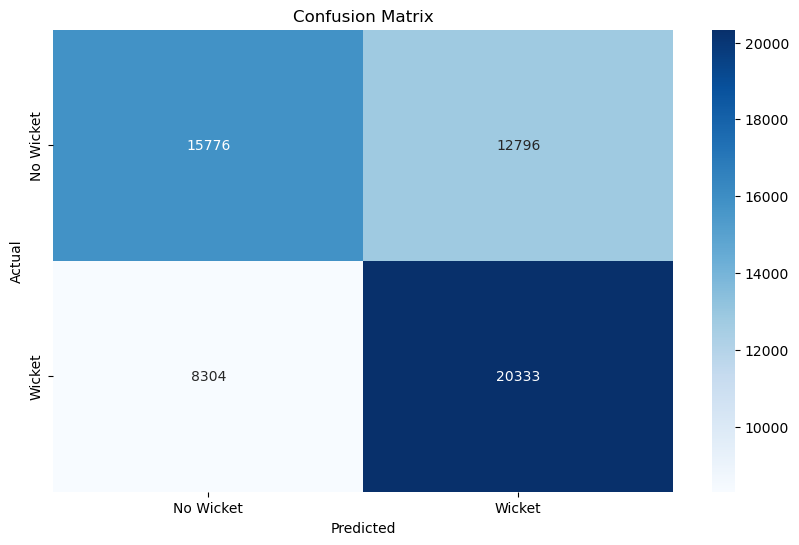

In [3]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Wicket', 'Wicket'], yticklabels=['No Wicket', 'Wicket'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

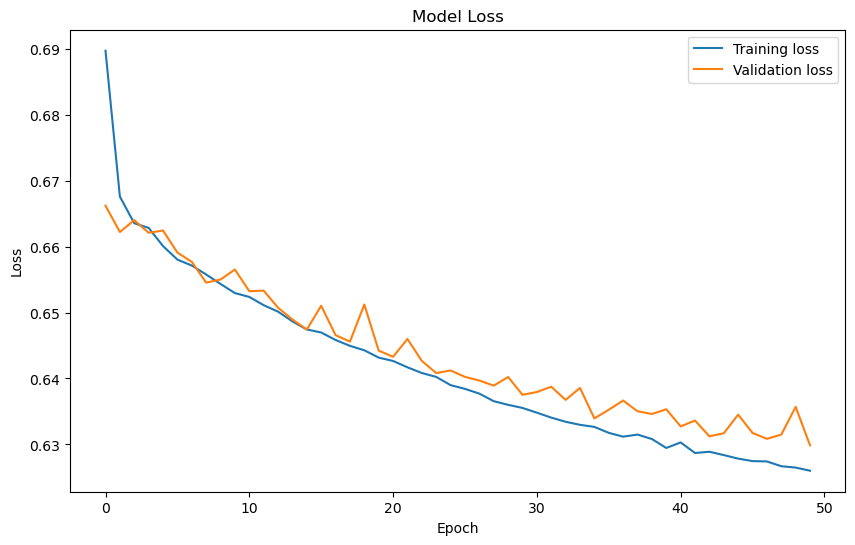

In [4]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

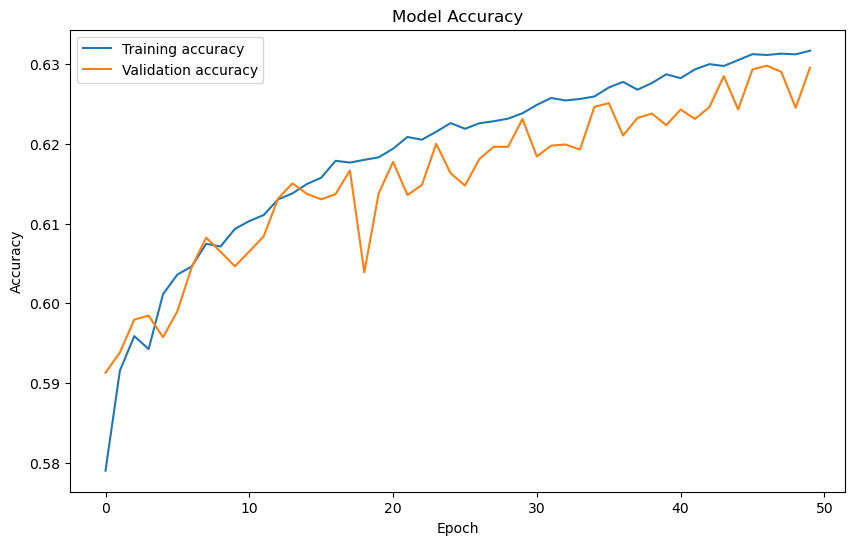

In [5]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Insights and Recommendations:
1. **Model Performance**:
    - The model is a good predictor of wickets in a cricket match since it reaches a respectable level of accuracy and balanced performance measures.
    - The training and validation metrics' relatively tight alignment indicates that the model does not overfit and has good generalization.

2. **Feature Engineering**:
    - The model's performance appears to be positively impacted by feature engineering, which includes the development of cumulative score, runs in the previous five overs, and hand encoding of categorical variables.
    - The model's performance could be further enhanced by adding more features or by using more intricate feature engineering.
    
3. **Data Balancing**:
    - In order to ensure that the model has balanced classes to learn from and avoid bias towards the dominant class, the minority class (wickets) was upsampled.

4. **Potential Improvements**:
    - Experiment with different architectures, such as adding more layers or using different activation functions, to see if they yield better performance.
    - Use more sophisticated methods for feature selection and engineering to capture more nuanced patterns in the data.
    - Try different techniques for handling class imbalance, such as SMOTE or other resampling methods.

5. **Next Steps**:
    - Further tuning of hyperparameters (e.g., learning rate, batch size, number of epochs) using techniques such as grid search or random search could help find a more optimal configuration for the model.
    - Explore other machine learning models, like Random Forest or Gradient Boosting, to compare their performance with the ANN model.

# Conclusions


Using historical data, this project has shown how to apply sophisticated machine learning algorithms to forecast important features of cricket matches. Using three different models—a Random Forest Classifier, a Gaussian Naive Bayes Classifier, and an Artificial Neural Network (ANN)—we investigated how well these algorithms predicted the amount of runs scored in a match and the probability that a wicket would fall on a particular delivery.

**Key Findings:**

1. **Random Forest Classifier**: The model demonstrated strong performance in categorizing total runs into several groups. Because of its ensemble structure, the Random Forest was able to manage the intricate relationships between many match-specific characteristics, producing results that were both accurate and well-balanced in terms of performance metrics for all classes.

2. **Gaussian Naive Bayes Classifier**: While the Naive Bayes model is simpler and computationally efficient, its assumptions of feature independence resulted in slightly lower performance compared to the Random Forest. However, it still offered valuable insights and a reasonable predictive accuracy, making it a useful baseline model.

3. **Artificial Neural Network**: The ANN demonstrated its superiority in estimating the likelihood of a wicket falling by utilizing its capacity to represent non-linear correlations and interactions between features. The evaluation measures showed a solid mix between precision and recall, and the model's performance improved steadily with training, demonstrating the ANN's efficacy in handling challenging cricket prediction tasks.

**Overall Insights:**

- **Data Quality and Preparation**: All of the models demonstrated the significance of feature engineering, managing class imbalances, and doing extensive data purification. An appropriate preparation of the data greatly improved the predicted accuracy and dependability of the models.
  
- **Model Selection**: Every model contributed distinct advantages. The ANN was effective in identifying complex patterns in the data, the Random Forest was reliable and adaptable, and the Naive Bayes was effective and easy to understand. The type of dataset and the particular needs of the prediction task will determine which model is best.

- **Predictive Capabilities**: When trained and validated appropriately, machine learning models can offer substantial predictive potential and insights for analyzing cricket matches. With the help of these forecasts, teams may make more strategic decisions, which will improve their performance and competitive advantage.

In conclusion, this assignment demonstrates how machine learning may be applied to sports analytics, specifically in the context of cricket. We can find important trends and create wise forecasts by utilizing historical data and cutting-edge algorithms, which will ultimately advance the rapidly developing field of sports analytics.

